<a href="https://colab.research.google.com/github/beratcmn/tweet-sentiment-emotion/blob/main/notebooks/tweet_sentiment_and_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Getting the data

In [ ]:
!mkdir data
!wget https://transfer.sh/yrO6hoF2f5/archive%20%283%29.zip -O ./data/data.zip
!unzip ./data/data.zip -d ./data

--2023-07-04 21:24:33--  https://transfer.sh/yrO6hoF2f5/archive%20%283%29.zip
Resolving transfer.sh (transfer.sh)... 144.76.136.153, 2a01:4f8:200:1097::2
Connecting to transfer.sh (transfer.sh)|144.76.136.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3095050 (3.0M) [application/zip]
Saving to: ‘./data/data.zip’

./data/data.zip     100%[===================>]   2.95M  3.61MB/s    in 0.8s    

2023-07-04 21:24:34 (3.61 MB/s) - ‘./data/data.zip’ saved [3095050/3095050]

Archive:  ./data/data.zip
  inflating: ./data/sentiment-emotion-labelled_Dell_tweets.csv  


### Loading the data

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tweet_data_df = pd.read_csv("./data/sentiment-emotion-labelled_Dell_tweets.csv")

In [ ]:
tweet_data_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


### Cleaning the data

In [ ]:
tweet_data_df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

In [ ]:
tweet_data_df = tweet_data_df.drop(["Unnamed: 0", "Datetime", "Tweet Id", "Username"], axis=1)

In [ ]:
tweet_data_df.head(n=10)

,Text,sentiment,sentiment_score,emotion,emotion_score
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral,0.853283,anticipation,0.587121
1,@MK_habit_addict @official_stier @MortalKombat...,neutral,0.519470,joy,0.886913
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive,0.763791,joy,0.960347
3,@dell your customer service is horrible especi...,negative,0.954023,anger,0.983203
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral,0.529170,anger,0.776124
5,The screenshot is acting up from the website o...,negative,0.936235,sadness,0.968651
6,@emijuju_ @Alienware @Dell @IntelGaming alien ...,neutral,0.733473,fear,0.370504
7,COOKING STREAM DAY!!! Ty to @Alienware for spo...,positive,0.974963,joy,0.961772
8,@emijuju_ @Alienware @Dell @intel Beautiful 😍❤️😻,positive,0.974661,joy,0.986383
9,What's your biggest data management challenge?...,neutral,0.718806,optimism,0.894296


### Playing with the data

In [ ]:
tweet_data_df.isnull().sum()

Text               0
sentiment          0
sentiment_score    0
emotion            0
emotion_score      0
dtype: int64

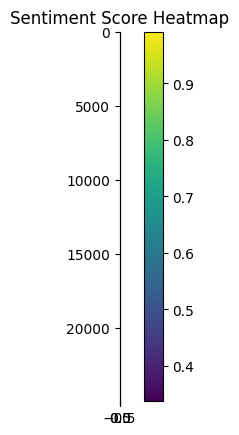

In [ ]:
heatmap_data = tweet_data_df["sentiment_score"].values
heatmap_data = heatmap_data.reshape(-1, 1)
plt.imshow(heatmap_data, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Sentiment Score Heatmap')
plt.show()

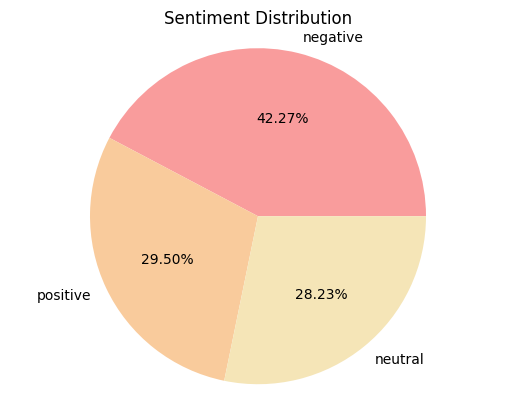

In [ ]:
sentiment_counts = tweet_data_df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

colors = [
    '#F99C9C',  # Light Coral
    '#F9CB9C',  # Peach
    '#F5E5B7',  # Pale Gold
    '#E9E1CC',  # Champagne
    '#FFE1AB',  # Pale Yellow
    '#E8D8B5',  # Pale Beige
    '#FFD1B3',  # Light Salmon
    '#E2B6AB'   # Dusty Rose
]


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')

plt.title('Sentiment Distribution')
plt.axis('equal')

plt.show()

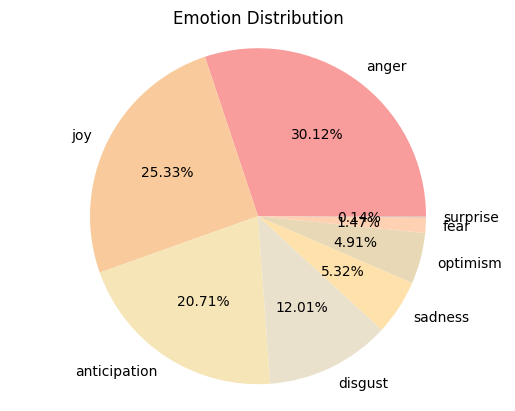

In [ ]:
emotion_counts = tweet_data_df['emotion'].value_counts()
labels = emotion_counts.index
sizes = emotion_counts.values

colors = [
    '#F99C9C',  # Light Coral
    '#F9CB9C',  # Peach
    '#F5E5B7',  # Pale Gold
    '#E9E1CC',  # Champagne
    '#FFE1AB',  # Pale Yellow
    '#E8D8B5',  # Pale Beige
    '#FFD1B3',  # Light Salmon
    '#E2B6AB'   # Dusty Rose
]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%')

plt.title('Emotion Distribution')
plt.axis('equal')

plt.show()

### Creating word indexes

#### Getting the text data

In [ ]:
text_data = tweet_data_df["Text"].tolist()
text_data[:10]

['@Logitech @apple @Google @Microsoft @Dell @Lenovo #WhatIf QWERTY were modified for programmers so things like brackets, parens, quotes, operators, etc. moved to the middle near G-H splitting left/right brackets to separate hands, and relieving the less dextrous pinky finger?',
 "@MK_habit_addict @official_stier @MortalKombat @newzealand She's getting a new @Dell #laptop when the one she has one only 2-3 years old.  (More than triple the price - though much higher utility). https://t.co/7WvkCw7vQf",
 'As\xa0@CRN\xa0celebrates its 40th anniversary,\xa0Bob Faletra\xa0and\xa0@stevenjburke\xa0spoke with me about the milestones, companies and personalities that helped build the channel.\xa0https://t.co/stiuBObP1O #CRN40\xa0#podcast\xa0#internationalpodcastday @Cisco @Microsoft @HPE @hp @Dell @intel',
 '@dell your customer service is horrible especially agent syedfaisal who has made this experience of purchasing a new computer downright awful and I’ll reconsider ever buying a Dell in the fu

In [ ]:
len(text_data), len(tweet_data_df["Text"].tolist())

(24970, 24970)

#### Creating a tokenizer and training

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(text_data)

In [ ]:
word_indexes = tokenizer.word_index

In [ ]:
len(word_indexes), list(word_indexes.items())[:5]

(48453, [('dell', 1), ('the', 2), ('to', 3), ('and', 4), ('a', 5)])

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

48454

#### Converting text to sequences

In [ ]:
sequences = tokenizer.texts_to_sequences(text_data)

In [ ]:
max(len(seq) for seq in sequences)

112

In [ ]:
max_sequence_length = 128
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=128)
padded_sequences[:2]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,   966,    95,   235,
           85,     1,   100, 17705, 17706,   251,  7272,    11,  8344,
           37,   395,    59,  8345, 17707,  4717,  9848,   587,  1050,
            3,     2,  1411,  1362,  1412,  1640,  7273,   578,   202,
         8345,     3,  2631,  1295,     4, 17708,     2,   375, 17709,
      

#### Converting emotions and sentiments to numbers

In [ ]:
emotion_list = tweet_data_df["emotion"].tolist()
sentiment_list = tweet_data_df["sentiment"].tolist()

In [ ]:
emotion_map = {
    "anger": 0,
    "anticipation": 1,
    "disgust": 2,
    "fear" : 3,
    "joy" : 4,
    "optimism" : 5,
    "sadness" : 6,
    "surprise" : 7
}

sentiment_map = {
    "neutral" : 0,
    "positive" : 1,
    "negative" : 2,
}

In [ ]:
emotion_labels = [emotion_map[label] for label in emotion_list]
sentiment_labels = [sentiment_map[label] for label in sentiment_list]

In [ ]:
emotion_labels = np.array(emotion_labels)
sentiment_labels = np.array(sentiment_labels)

In [ ]:
emotion_labels.shape

(24970,)

In [ ]:
sentiment_labels.shape

(24970,)

In [ ]:
padded_sequences.shape

(24970, 128)

### Decoder

In [ ]:
def tweet_decoder(encoded_tweet):
    encoded_tweet = list(filter(lambda x: x != 0, encoded_tweet))
    decoded_tweet = ""
    index_words = {index: word for word, index in word_indexes.items()}
    for encoded_word in encoded_tweet:
        decoded_word = index_words.get(encoded_word)
        if decoded_word:
            decoded_tweet += decoded_word + " "
    return decoded_tweet.strip()

### Building the model 1

In [ ]:
input_layer = tf.keras.layers.Input(shape=max_sequence_length)
embedding_layer = tf.keras.layers.Embedding(vocab_size, 100)(input_layer)
dropout_layer = tf.keras.layers.Dropout(0.2)(embedding_layer)
average_pooling_1d_layer = tf.keras.layers.GlobalAveragePooling1D()(dropout_layer)
dense_layer_1 = tf.keras.layers.Dense(1024,activation='relu')(average_pooling_1d_layer)
emotion_output_layer = tf.keras.layers.Dense(8, activation='softmax', name='emotion_output')(dense_layer_1)
sentiment_output_layer = tf.keras.layers.Dense(3, activation='softmax', name='sentiment_output')(dense_layer_1)

model = tf.keras.Model(inputs=input_layer, outputs=[emotion_output_layer, sentiment_output_layer])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 128, 100)     4845400     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 128, 100)     0           ['embedding[0][0]']              
                                                                                                  
 global_average_pooling1d (Glob  (None, 100)         0           ['dropout[0][0]']                
 alAveragePooling1D)                                                                          

In [ ]:
losses = {
    'emotion_output': 'sparse_categorical_crossentropy',
    'sentiment_output': 'sparse_categorical_crossentropy'
}
loss_weights = {
    'emotion_output': 1.0,
    'sentiment_output': 1.0
}

In [ ]:
model.compile(optimizer='adam', loss=losses, loss_weights=loss_weights, metrics=['accuracy'])

In [ ]:
history = model.fit(padded_sequences, {'emotion_output': emotion_labels, 'sentiment_output': sentiment_labels},
                    epochs=200, batch_size=2048, validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 6s 259ms/step - loss: 3.0823 - emotion_output_loss: 1.9892 - sentiment_output_loss: 1.0930 - emotion_output_accuracy: 0.2849 - sentiment_output_accuracy: 0.4009 - val_loss: 2.9127 - val_emotion_output_loss: 1.8530 - val_sentiment_output_loss: 1.0597 - val_emotion_output_accuracy: 0.3632 - val_sentiment_output_accuracy: 0.4892
Epoch 2/200
10/10 [==============================] - 2s 206ms/step - loss: 2.8652 - emotion_output_loss: 1.7734 - sentiment_output_loss: 1.0918 - emotion_output_accuracy: 0.2856 - sentiment_output_accuracy: 0.4061 - val_loss: 2.7388 - val_emotion_output_loss: 1.6778 - val_sentiment_output_loss: 1.0610 - val_emotion_output_accuracy: 0.3632 - val_sentiment_output_accuracy: 0.4892
Epoch 3/200
10/10 [==============================] - 2s 232ms/step - loss: 2.7880 - emotion_output_loss: 1.6995 - sentiment_output_loss: 1.0885 - emotion_output_accuracy: 0.3246 - sentiment_output_accuracy: 0.4061 - val_loss: 2.7236 - val

#### Testing

In [ ]:
X_test = padded_sequences
y_emotion_test = emotion_labels
y_sentiment_test = sentiment_labels

In [ ]:
emotion_predictions, sentiment_predictions = model.predict(X_test)

781/781 [==============================] - 2s 2ms/step


In [ ]:
emotion_predictions_labels = emotion_predictions.argmax(axis=1)
emotion_accuracy = (emotion_predictions_labels == y_emotion_test).mean()

sentiment_predictions_labels = sentiment_predictions.argmax(axis=1)
sentiment_accuracy = (sentiment_predictions_labels == y_sentiment_test).mean()

In [ ]:
print(f'Emotion Accuracy: {emotion_accuracy:.4f}')
print(f'Sentiment Accuracy: {sentiment_accuracy:.4f}')

Emotion Accuracy: 0.9163
Sentiment Accuracy: 0.9491


### Building the model 2

In [ ]:
input_layer = tf.keras.layers.Input(shape=max_sequence_length)

embedding_layer = tf.keras.layers.Embedding(vocab_size, 100)(input_layer)
dropout_layer = tf.keras.layers.Dropout(0.2)(embedding_layer)

lstm_layer = tf.keras.layers.LSTM(512)(dropout_layer)

reshape_layer = tf.keras.layers.Reshape((-1, 512))(lstm_layer)

average_pooling_1d_layer = tf.keras.layers.GlobalAveragePooling1D()(reshape_layer)

dense_layer_1 = tf.keras.layers.Dense(2048,activation='relu')(average_pooling_1d_layer)
dense_layer_2 = tf.keras.layers.Dense(2048,activation='relu')(dense_layer_1)
dense_layer_3 = tf.keras.layers.Dense(2048,activation='relu')(dense_layer_2)
dense_layer_4 = tf.keras.layers.Dense(1024,activation='relu')(dense_layer_3)

emotion_output_layer = tf.keras.layers.Dense(8, activation='softmax', name='emotion_output')(dense_layer_4)
sentiment_output_layer = tf.keras.layers.Dense(3, activation='softmax', name='sentiment_output')(dense_layer_4)

model = tf.keras.Model(inputs=input_layer, outputs=[emotion_output_layer, sentiment_output_layer])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 128, 100)     4845400     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 128, 100)     0           ['embedding[0][0]']              
                                                                                                  
 lstm (LSTM)                    (None, 512)          1255424     ['dropout[0][0]']                
                                                                                              

In [ ]:
losses = {
    'emotion_output': 'sparse_categorical_crossentropy',
    'sentiment_output': 'sparse_categorical_crossentropy'
}
loss_weights = {
    'emotion_output': 1.0,
    'sentiment_output': 1.0
}

In [ ]:
model.compile(optimizer='adam', loss=losses, loss_weights=loss_weights, metrics=['accuracy'])

In [ ]:
history = model.fit(padded_sequences, {'emotion_output': emotion_labels, 'sentiment_output': sentiment_labels},
                    epochs=100, batch_size=2048, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 14s 797ms/step - loss: 3.0567 - emotion_output_loss: 1.9108 - sentiment_output_loss: 1.1460 - emotion_output_accuracy: 0.2146 - sentiment_output_accuracy: 0.3417 - val_loss: 2.8135 - val_emotion_output_loss: 1.6930 - val_sentiment_output_loss: 1.1205 - val_emotion_output_accuracy: 0.3548 - val_sentiment_output_accuracy: 0.2589
Epoch 2/100
10/10 [==============================] - 8s 815ms/step - loss: 2.6621 - emotion_output_loss: 1.6388 - sentiment_output_loss: 1.0234 - emotion_output_accuracy: 0.3578 - sentiment_output_accuracy: 0.4840 - val_loss: 2.3110 - val_emotion_output_loss: 1.4494 - val_sentiment_output_loss: 0.8616 - val_emotion_output_accuracy: 0.4732 - val_sentiment_output_accuracy: 0.6043
Epoch 3/100
10/10 [==============================] - 8s 765ms/step - loss: 2.2077 - emotion_output_loss: 1.3926 - sentiment_output_loss: 0.8151 - emotion_output_accuracy: 0.4729 - sentiment_output_accuracy: 0.6091 - val_loss: 2.0801 - va